In [549]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from src.pipeline import *

In [618]:
path = 'Data/SEGMENTATION/2017 Pew Research Center Science and News Survey/Segmentation_data.csv'

In [1044]:
segment_vars1 = ['TOPICINT_a', 'TOPICINT_b', 'TOPICINT_c', 'TOPICINT_d',
                'TOPICINT_e', 'TOPICINT_f',
                'SCIOFTEN', 'TOPICS1', 'SOURCE1', 'SOURCE2', 'SEEK',
                'SCIWHY_a', 'SCIWHY_b', 'SCIWHY_c', 'SCIWHY_d', 'SCIWHY_e',
                'SCIWHY_g', 'WHYNOT_a', 'WHYNOT_b', 'WHYNOT_c', 'WHYNOT_d',
                 'WHYNOT_e', 'WHYNOT_f', 'WHYNOT_g', 'WHYNOT_h']

segment_vars2 = ['TOPICINT_a', 'TOPICINT_b', 'TOPICINT_c', 'TOPICINT_d',
                'TOPICINT_e', 'TOPICINT_f',
                'SCIOFTEN', 'TOPICS1', 'ENJOY', 'KNOWLEDGE',
                'SCIWHY_a', 'SCIWHY_b', 'SCIWHY_c', 'SCIWHY_d', 'SCIWHY_e',
                'SCIWHY_g', 'WHYNOT_a', 'WHYNOT_b', 'WHYNOT_c', 'WHYNOT_d',
                 'WHYNOT_e', 'WHYNOT_f', 'WHYNOT_g', 'WHYNOT_h']

segment_vars3 = ['TOPICINT_a', 'TOPICINT_b', 'TOPICINT_c', 'TOPICINT_d',
                'TOPICINT_e', 'TOPICINT_f',
                'SCIOFTEN', 'TOPICS1', 'ENJOY', 'KNOWLEDGE']

segment_vars4 = ['TOPICINT_a', 'TOPICINT_b', 'TOPICINT_c', 'TOPICINT_d',
               'TOPICINT_e', 'TOPICINT_f', 'ENJOY', 'KNOWLEDGE', 'SCIOFTEN']

segment_vars5 = ['TOPICINT_c', 'TOPICINT_e', 'TOPICINT_f', 'SCIOFTEN', 'TOPICS1']

segment_vars6 = ['ENJOY', 'KNOWLEDGE', 'SCIOFTEN', 'TOPICS1']



In [1045]:
data1, segment_data1 = get_cluster_data(path, segment_vars1)
data2, segment_data2 = get_cluster_data(path, segment_vars2)
data3, segment_data3 = get_cluster_data(path, segment_vars3)
data4, segment_data4 = get_cluster_data(path, segment_vars4)
data5, segment_data5 = get_cluster_data(path, segment_vars5)
data6, segment_data6 = get_cluster_data(path, segment_vars6)

In [1046]:
k_vals = [3, 4, 5, 6, 7, 8, 9, 10]

## Cluster Methods to try
- kMeans
- Hierarchical
    - Linkages:
        - Ward
        - Complete
        - Average
        - Single
- Expectation–Maximization (EM) Clustering using Gaussian Mixture Models (GMM)
    - Uses probability to determine which cluster it belongs to
    - Can have a mixed classification for a point (X belongs x% to class 1 and y% to class 2)
- DBSCAN


### Assessing the quality
- Assuming there will be anywehere between 4-8 clusters
- Will use the silhoutte score and WCSS for K Means
- Will use sihoutte score for Hierarchical
- For the Gaussian Mixture Model seeing the % mixed classification is a good indicator of how good the model is
    - Want a segment to belong at least (70%?) to one class or the other


In [1047]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# KMeans

In [1048]:
def euclidean_distance(x, y):
    euc = x-y
    dist = (np.sqrt(sum(euc**2)))
    return dist

In [1049]:
def wcss_score(X, labels, centers):
    wcss = 0
    X_data = X.copy()
    X_data['labels'] = labels
    X_data = np.asarray(X_data)
    for label in set(X_data[:, -1]):
        #sum of distance squared between all points and centroid in cluster
        for x_i in (X_data[X_data[:, -1] == label]):
            dist = euclidean_distance(x_i[:-1], centers[int(label)])
            wcss += dist**2

    return wcss

In [1050]:
def plot_scores_kmeans(X, k_vals):
    wcss_scores = []
    sil_scores = []
    for k in k_vals:
        model = KMeans(n_clusters = k)
        fit_model = model.fit(X)
        labels = fit_model.labels_
        centers = fit_model.cluster_centers_
        wcss = wcss_score(X, labels, centers)
        wcss_scores.append(wcss)
        sil = silhouette_score(X, labels)
        sil_scores.append(sil)
        
    fig, ax = plt.subplots()
    ax.plot(k_vals, wcss_scores, 'o-')
    ax.set_xlabel("number of clusters")
    ax.set_ylabel("within-cluster sum of squares")
    
    fig, ax = plt.subplots()
    ax.plot(k_vals, sil_scores, 'o-')
    ax.set_xlabel("number of clusters")
    ax.set_ylabel("silhouette scores")
    print(sil_scores)

    plt.show()

### Assessing best K and best segment variables to use

#### Segment Vars1

[0.09994920074974417, 0.09786945045857022, 0.09017414610490386, 0.08894405028842206, 0.0906493459391709, 0.0860645612528826, 0.08090783942961578, 0.07846677718555575]


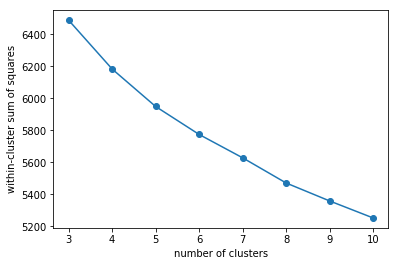

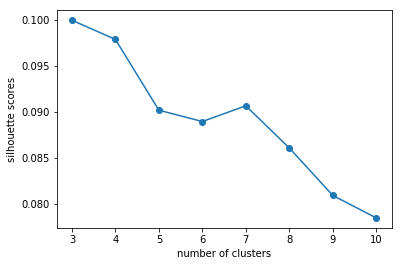

In [1051]:
plot_scores_kmeans(segment_data1, k_vals)

#### Segment Vars2

[0.09672222215111291, 0.09959706586216666, 0.09558207887427105, 0.07973379482290438, 0.07705642137061312, 0.07412615453993707, 0.06647287579971976, 0.06809351064616204]


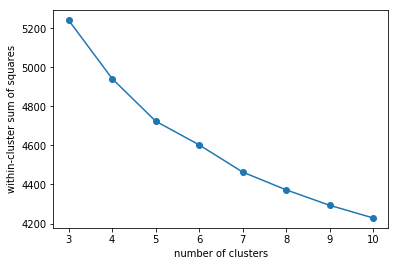

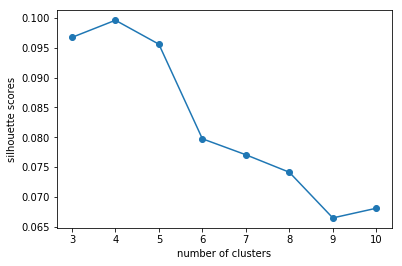

In [1052]:
plot_scores_kmeans(segment_data2, k_vals)

#### Segment Vars3

[0.23838606102785864, 0.16980131365222068, 0.16197195284290078, 0.15187096716799717, 0.14587492114395992, 0.13626625054187438, 0.13323013745586276, 0.12625264947289186]


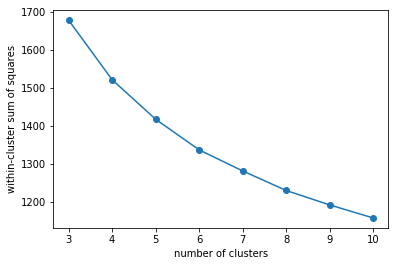

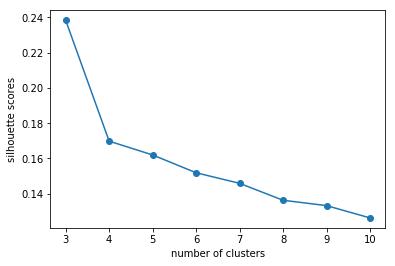

In [1053]:
plot_scores_kmeans(segment_data3, k_vals)

#### Segment Vars4

[0.16114242810491322, 0.14412310190528702, 0.13504078271973757, 0.13277144337012797, 0.12662486358484915, 0.12197886056810109, 0.1219645832099533, 0.12295424496545851]


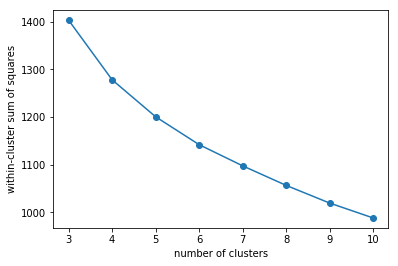

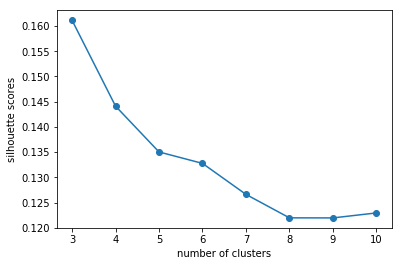

In [1054]:
plot_scores_kmeans(segment_data4, k_vals)

#### Segment Vars 5

[0.3161766159307462, 0.2739163884472821, 0.26509367531463945, 0.2613384715235085, 0.2600471497244701, 0.24818244857854777, 0.25089336532289547, 0.24961229823156614]


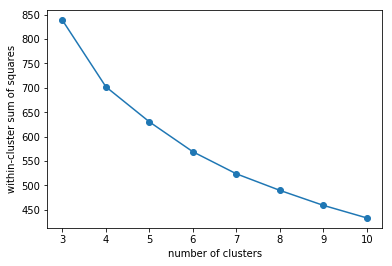

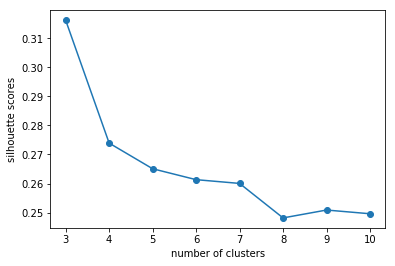

In [1055]:
plot_scores_kmeans(segment_data5, k_vals)

#### Segment Vars 6

[0.44910879703995377, 0.39638423801649936, 0.39968767841009334, 0.3634666537982842, 0.36976637798711326, 0.3813615124248082, 0.4353287175297925, 0.4471343645328381]


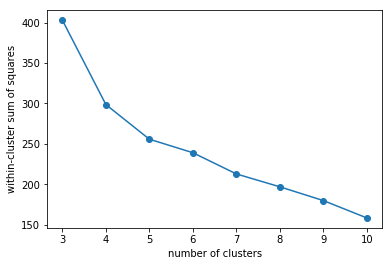

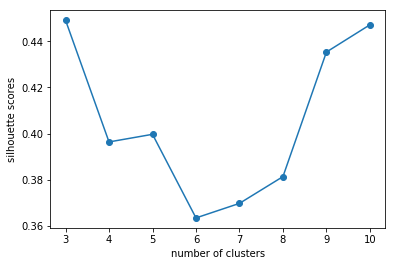

In [1056]:
plot_scores_kmeans(segment_data6, k_vals)

##### Seems like k = 3 or K = 4. Will use Segment Vars 6

# Hierarchical Clustering

In [732]:
def plot_sil_scores_hclust(X, k_vals, affinity, linkage):
    sil_scores = []
    for k in k_vals:
        model = AgglomerativeClustering(n_clusters = k, affinity =affinity, linkage = linkage)
        fit_model = model.fit(X)
        labels = fit_model.labels_
        sil = silhouette_score(X, labels)
        sil_scores.append(sil)
        
    fig, ax = plt.subplots()
    ax.plot(k_vals, sil_scores, 'o-')
    ax.set_xlabel("number of clusters")
    ax.set_ylabel("silhouette scores")
    print(sil_scores)

    plt.show()

### Assessing best K and best segment variables to use

#### Segment Vars1

[0.08122552177540002, 0.08448713157491625, 0.07461704830517119, 0.0800622761842239, 0.0731064882154632, 0.06452727799258312, 0.06673375761161822, 0.06730409732411265]


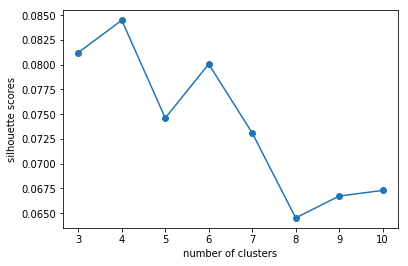

In [1057]:
## Can only use Euclidean with Ward
plot_sil_scores_hclust(segment_data1, k_vals, 'euclidean', 'ward')

[0.09986827343244013, 0.08087796049911614, 0.0761741277474333, 0.05642660071511373, 0.04587166752231659, 0.02992579332138686, 0.023152672540076618, 0.025856975857792053]


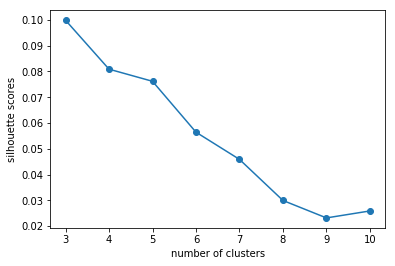

[0.1064874175892791, 0.06328868514485053, 0.05473521095528515, 0.037460443140875536, 0.029431611408951404, 0.025732849469463526, 0.027731215129590675, 0.02834014944209926]


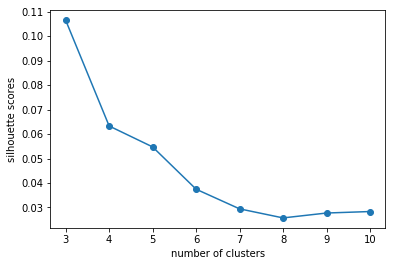

[0.1064874175892791, 0.06328868514485053, 0.05473521095528515, 0.037460443140875536, 0.029431611408951404, 0.025732849469463526, 0.027731215129590675, 0.02834014944209926]


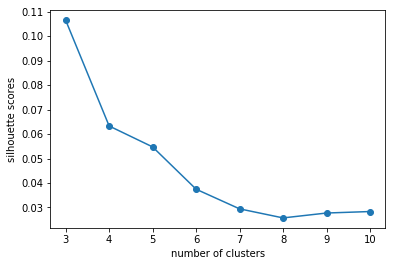

[0.09986827343244013, 0.08087796049911614, 0.0761741277474333, 0.05642660071511373, 0.04587166752231659, 0.02992579332138686, 0.023152672540076618, 0.025856975857792053]


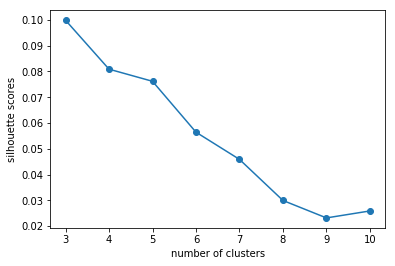

[0.06121648199972212, 0.04358281564832641, 0.05069225508400638, 0.050276433758206604, 0.04239910377992104, 0.04320738996674154, 0.03254192333317789, 0.030253184109011]


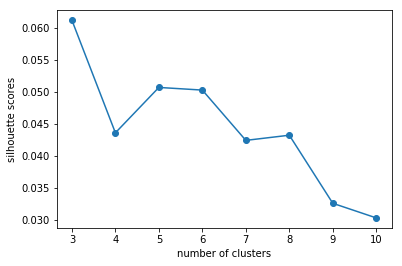

In [1058]:
plot_sil_scores_hclust(segment_data1, k_vals, 'euclidean', 'complete')
plot_sil_scores_hclust(segment_data1, k_vals, 'manhattan', 'complete')
plot_sil_scores_hclust(segment_data1, k_vals, 'l1', 'complete')
plot_sil_scores_hclust(segment_data1, k_vals, 'l2', 'complete')
plot_sil_scores_hclust(segment_data1, k_vals, 'cosine', 'complete')

[0.1650110881694442, 0.13046894069338227, 0.08464584408446477, 0.06558436722880738, 0.06227705959740676, 0.05580903462356771, 0.05506761895209701, 0.032402521786582934]


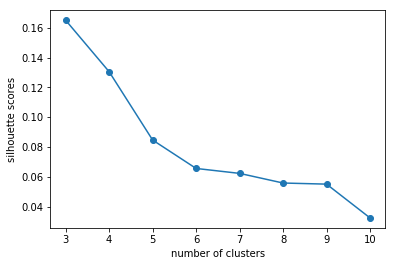

[0.1263343465930235, 0.10459563838417764, 0.08475890872591284, 0.06444610313347907, 0.04875775833445502, 0.042707847423336054, 0.037022302036488285, 0.03659517506033586]


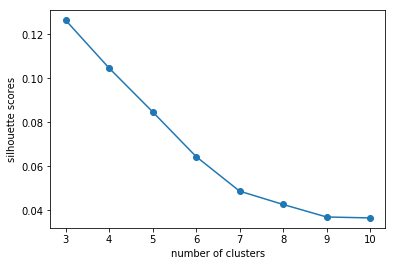

[0.1263343465930235, 0.10459563838417764, 0.08475890872591284, 0.06444610313347907, 0.04875775833445502, 0.042707847423336054, 0.037022302036488285, 0.03659517506033586]


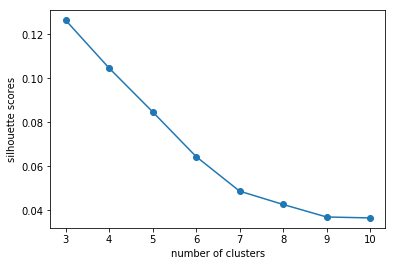

[0.1650110881694442, 0.13046894069338227, 0.08464584408446477, 0.06558436722880738, 0.06227705959740676, 0.05580903462356771, 0.05506761895209701, 0.032402521786582934]


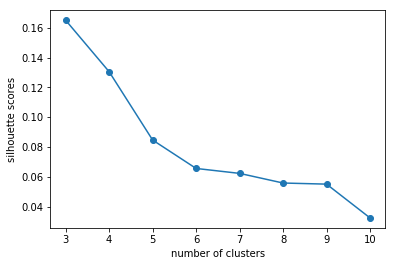

[0.2001006562798294, 0.18264680861472657, 0.16457930842046878, 0.15710583690109767, 0.144243327255965, 0.10186543996309533, 0.09233701288034066, 0.09162443716024742]


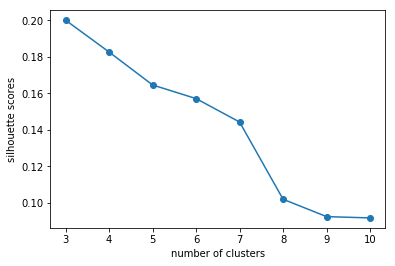

In [1059]:
plot_sil_scores_hclust(segment_data1, k_vals, 'euclidean', 'average')
plot_sil_scores_hclust(segment_data1, k_vals, 'manhattan', 'average')
plot_sil_scores_hclust(segment_data1, k_vals, 'l1', 'average')
plot_sil_scores_hclust(segment_data1, k_vals, 'l2', 'average')
plot_sil_scores_hclust(segment_data1, k_vals, 'cosine', 'average')

> ##### Best: K = 4, Cosine, Average: .24

#### Segment Vars 2 

[0.1369211754176025, 0.07974445245517656, 0.06980800993038459, 0.06664783966334564, 0.05153893947067365, 0.05371113974569806, 0.05033468890215822, 0.0462922291847561]


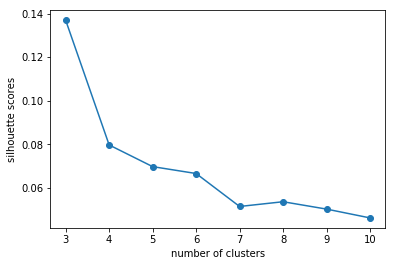

In [1060]:
plot_sil_scores_hclust(segment_data2, k_vals, 'euclidean', 'ward')

[0.09589736390236762, 0.07372377046164323, 0.03360170838365856, 0.03051784323187101, 0.026445446513444163, 0.02538069454577941, 0.02175300766608627, 0.018123971260094726]


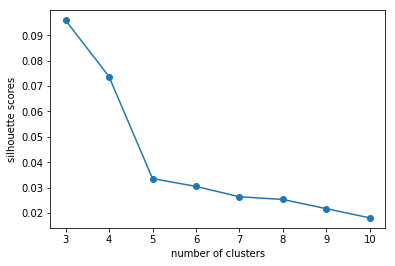

[0.0999142790529866, 0.0614680742861896, 0.05627647271389994, 0.05390395950399599, 0.04819612959377958, 0.03488489755321279, 0.02995498273604876, 0.028826075870244345]


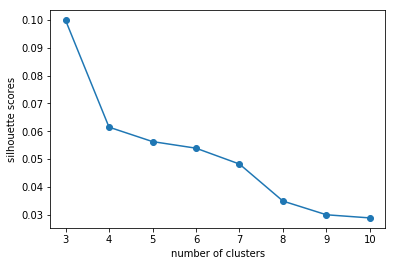

[0.0999142790529866, 0.0614680742861896, 0.05627647271389994, 0.05390395950399599, 0.04819612959377958, 0.03488489755321279, 0.02995498273604876, 0.028826075870244345]


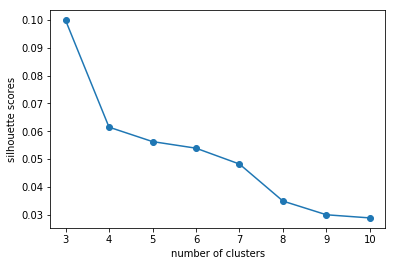

[0.09589736390236762, 0.07372377046164323, 0.03360170838365856, 0.03051784323187101, 0.026445446513444163, 0.02538069454577941, 0.02175300766608627, 0.018123971260094726]


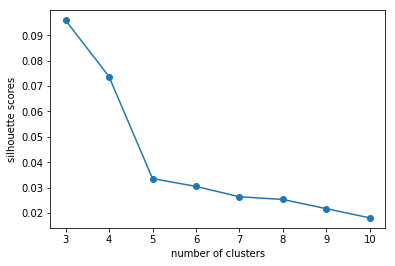

[0.10891020982615432, 0.10993068459206837, 0.11002435939413506, 0.0986690736787256, 0.04593199211733638, 0.04435186543727737, 0.02795828751158296, 0.027755948821111737]


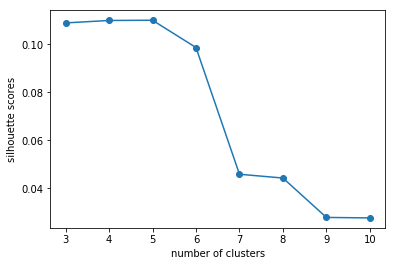

In [1061]:
plot_sil_scores_hclust(segment_data2, k_vals, 'euclidean', 'complete')
plot_sil_scores_hclust(segment_data2, k_vals, 'manhattan', 'complete')
plot_sil_scores_hclust(segment_data2, k_vals, 'l1', 'complete')
plot_sil_scores_hclust(segment_data2, k_vals, 'l2', 'complete')
plot_sil_scores_hclust(segment_data2, k_vals, 'cosine', 'complete')

[0.2201633363872736, 0.20413682181484083, 0.17074997278028542, 0.1574515110650158, 0.12736835706129523, 0.10059700229035592, 0.09232868429565966, 0.0827674942937399]


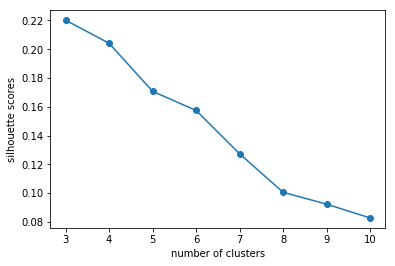

[0.22055755811708064, 0.18725719220514622, 0.14827472203034758, 0.11910346152267545, 0.1006211192012316, 0.08381145944068105, 0.06983614489011972, 0.0629766669226845]


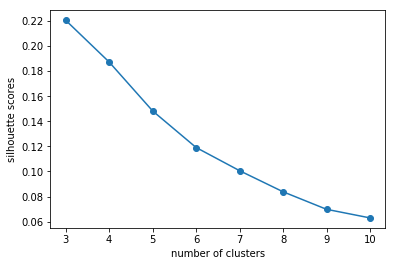

[0.22055755811708064, 0.18725719220514622, 0.14827472203034758, 0.11910346152267545, 0.1006211192012316, 0.08381145944068105, 0.06983614489011972, 0.0629766669226845]


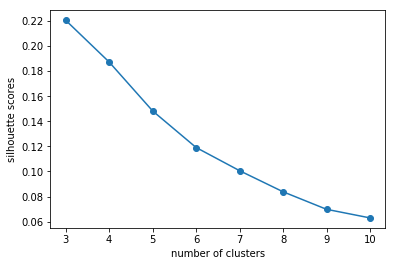

[0.2201633363872736, 0.20413682181484083, 0.17074997278028542, 0.1574515110650158, 0.12736835706129523, 0.10059700229035592, 0.09232868429565966, 0.0827674942937399]


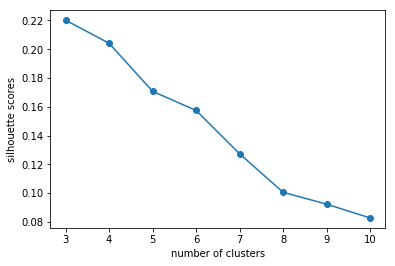

[0.2091578074260465, 0.19151069899383608, 0.1629713062401182, 0.14181705933868177, 0.14395817777949035, 0.1270075128273336, 0.11259551744546577, 0.10020974630149909]


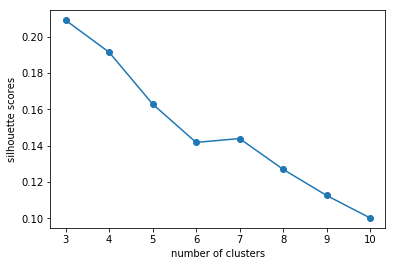

In [1062]:
plot_sil_scores_hclust(segment_data2, k_vals, 'euclidean', 'average')
plot_sil_scores_hclust(segment_data2, k_vals, 'manhattan', 'average')
plot_sil_scores_hclust(segment_data2, k_vals, 'l1', 'average')
plot_sil_scores_hclust(segment_data2, k_vals, 'l2', 'average')
plot_sil_scores_hclust(segment_data2, k_vals, 'cosine', 'average')

> #### Best: K = 3, Average, Euclidean: .22

#### Segment Vars3

[0.22260063318165613, 0.14396949934669392, 0.13849847876474589, 0.12076608996124165, 0.09945339886313892, 0.09079288631898721, 0.08991427048698897, 0.08858350444053978]


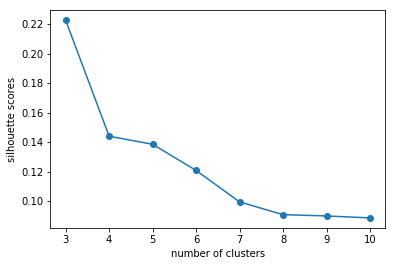

In [1063]:
plot_sil_scores_hclust(segment_data3, k_vals, 'euclidean', 'ward')

[0.031738446134602985, 0.08261782596186566, 0.04906426560138374, 0.03881139409091515, 0.06250870281780162, 0.073713148437936, 0.0676072947433288, 0.07034040222926638]


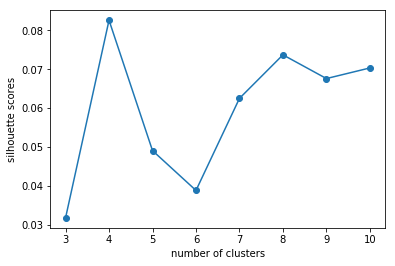

[0.23241810993844078, 0.2120131362830171, 0.07536413981308268, 0.04531661972536095, 0.05088661799795754, 0.060106750389612926, 0.05295587284840506, 0.04283733264010138]


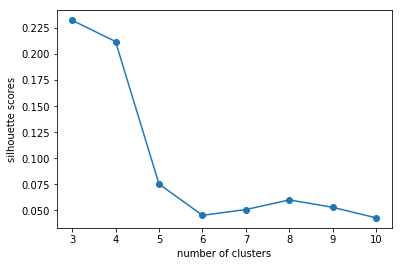

[0.23241810993844078, 0.2120131362830171, 0.07536413981308268, 0.04531661972536095, 0.05088661799795754, 0.060106750389612926, 0.05295587284840506, 0.04283733264010138]


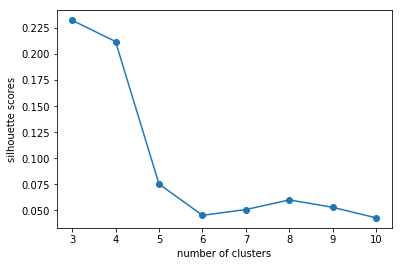

[0.031738446134602985, 0.08261782596186566, 0.04906426560138374, 0.03881139409091515, 0.06250870281780162, 0.073713148437936, 0.0676072947433288, 0.07034040222926638]


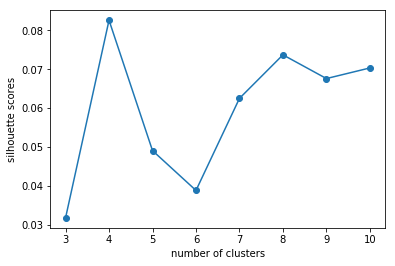

[0.18995791138536866, 0.03713479516151432, 0.03519574456859429, 0.05138034666170892, 0.04097144121681551, 0.03351626360737194, 0.027639741263306015, 0.027184301570443128]


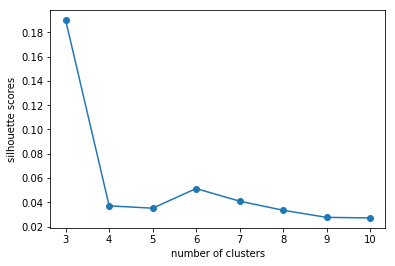

In [1064]:
plot_sil_scores_hclust(segment_data3, k_vals, 'euclidean', 'complete')
plot_sil_scores_hclust(segment_data3, k_vals, 'manhattan', 'complete')
plot_sil_scores_hclust(segment_data3, k_vals, 'l1', 'complete')
plot_sil_scores_hclust(segment_data3, k_vals, 'l2', 'complete')
plot_sil_scores_hclust(segment_data3, k_vals, 'cosine', 'complete')

[0.18461996435828212, 0.15858677788702538, 0.25441923582383774, 0.23184116632910437, 0.22733557211688504, 0.21588516012095949, 0.17463775435374754, 0.14273125969714617]


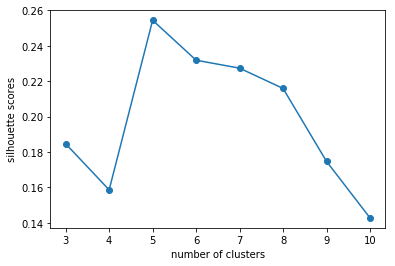

[0.281400314258791, 0.24351152313079763, 0.22803850785248464, 0.2158267151157249, 0.20515924635814758, 0.1869827634093446, 0.17593065627119042, 0.16457067355623836]


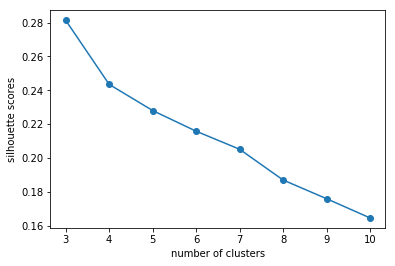

[0.281400314258791, 0.24351152313079763, 0.22803850785248464, 0.2158267151157249, 0.20515924635814758, 0.1869827634093446, 0.17593065627119042, 0.16457067355623836]


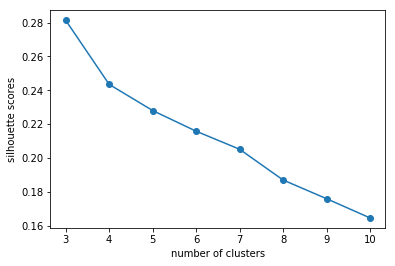

[0.18461996435828212, 0.15858677788702538, 0.25441923582383774, 0.23184116632910437, 0.22733557211688504, 0.21588516012095949, 0.17463775435374754, 0.14273125969714617]


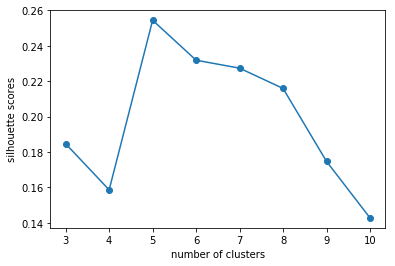

[0.28125283699383263, 0.22481604680478548, 0.16942908687015998, 0.15527836288008542, 0.15229687920578397, 0.13202651571207522, 0.12465375955136684, 0.10534032539187155]


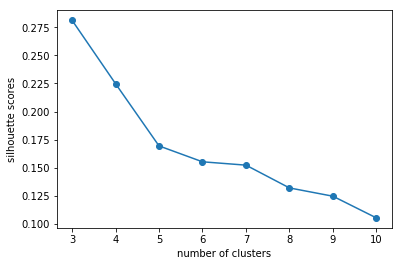

In [1065]:
plot_sil_scores_hclust(segment_data3, k_vals, 'euclidean', 'average')
plot_sil_scores_hclust(segment_data3, k_vals, 'manhattan', 'average')
plot_sil_scores_hclust(segment_data3, k_vals, 'l1', 'average')
plot_sil_scores_hclust(segment_data3, k_vals, 'l2', 'average')
plot_sil_scores_hclust(segment_data3, k_vals, 'cosine', 'average')

> ##### Best: K = 3, average, manhattan : .28

#### Segment Vars4

[0.12826095538590127, 0.08919036725371778, 0.07528268188876265, 0.07497734648861393, 0.07049084259722999, 0.0672567049770867, 0.06389448804578823, 0.06255824579884442]


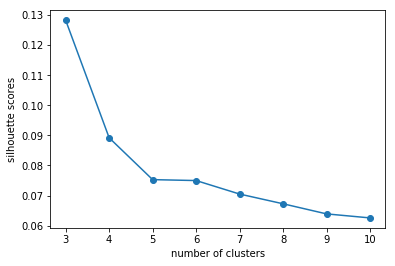

In [1066]:
plot_sil_scores_hclust(segment_data4, k_vals, 'euclidean', 'ward')

[0.11095160070564151, 0.09950319136387308, 0.06336536374679011, 0.0640169766785293, 0.050460749762477004, 0.04956468841263455, 0.04937363733038131, 0.035275361666853466]


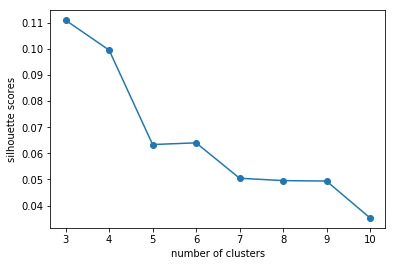

[0.09082321624378746, 0.07049201381085207, 0.06912182450079868, 0.052120395365559374, 0.05134404700776847, 0.04869716987764561, 0.03855231436833939, 0.032037447959436055]


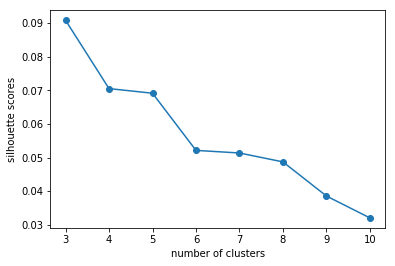

[0.09082321624378746, 0.07049201381085207, 0.06912182450079868, 0.052120395365559374, 0.05134404700776847, 0.04869716987764561, 0.03855231436833939, 0.032037447959436055]


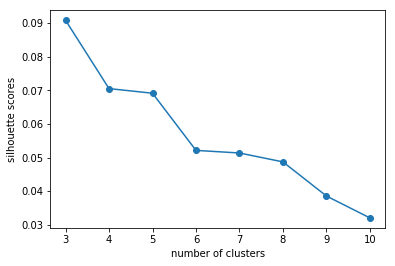

[0.11095160070564151, 0.09950319136387308, 0.06336536374679011, 0.0640169766785293, 0.050460749762477004, 0.04956468841263455, 0.04937363733038131, 0.035275361666853466]


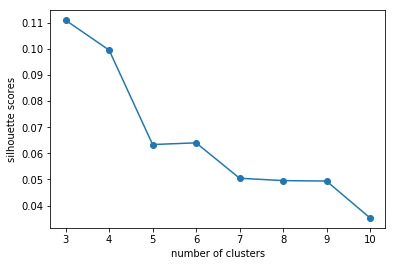

[0.02509461004935546, 0.023992627225656357, 0.03420402300007367, 0.01572838511799237, 0.010159280620309734, 0.007406952400401847, 0.004491796897161338, 0.00217275597354136]


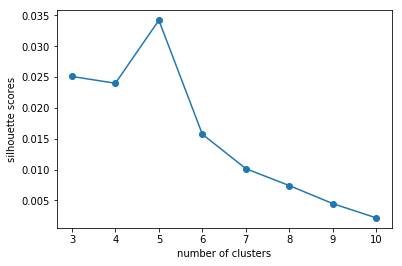

In [1067]:
plot_sil_scores_hclust(segment_data4, k_vals, 'euclidean', 'complete')
plot_sil_scores_hclust(segment_data4, k_vals, 'manhattan', 'complete')
plot_sil_scores_hclust(segment_data4, k_vals, 'l1', 'complete')
plot_sil_scores_hclust(segment_data4, k_vals, 'l2', 'complete')
plot_sil_scores_hclust(segment_data4, k_vals, 'cosine', 'complete')

[0.2512437866358459, 0.1809657702881463, 0.1477827978843028, 0.09197495367898699, 0.04651294931165778, 0.038271954937057304, 0.013320302387304602, 0.07869869699377023]


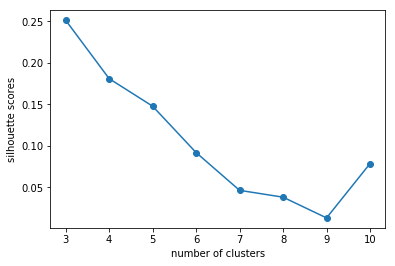

[0.2192423599775353, 0.1781564895842273, 0.16232184254237228, 0.12601889374760555, 0.11724563000862766, 0.11168331750177571, 0.10460322636160739, 0.0697864770537927]


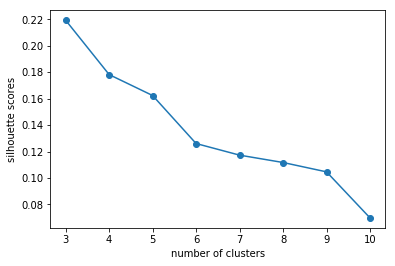

[0.2192423599775353, 0.1781564895842273, 0.16232184254237228, 0.12601889374760555, 0.11724563000862766, 0.11168331750177571, 0.10460322636160739, 0.0697864770537927]


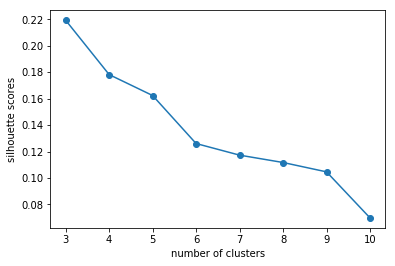

[0.2512437866358459, 0.1809657702881463, 0.1477827978843028, 0.09197495367898699, 0.04651294931165778, 0.038271954937057304, 0.013320302387304602, 0.07869869699377023]


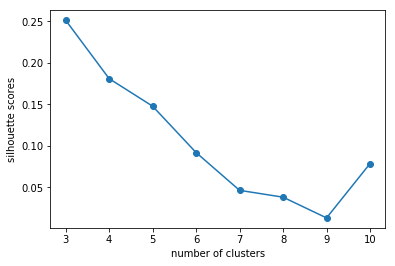

[0.22501300484197725, 0.18332026084513847, 0.12705824466000093, 0.09186221484352496, 0.06314658239180618, 0.00973285585676967, -0.02984175397824327, -0.05903425430752946]


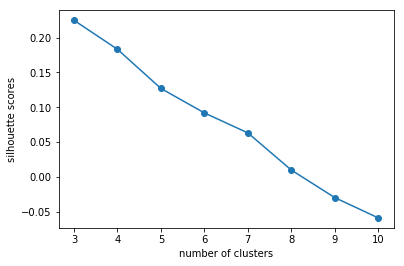

In [1068]:
plot_sil_scores_hclust(segment_data4, k_vals, 'euclidean', 'average')
plot_sil_scores_hclust(segment_data4, k_vals, 'manhattan', 'average')
plot_sil_scores_hclust(segment_data4, k_vals, 'l1', 'average')
plot_sil_scores_hclust(segment_data4, k_vals, 'l2', 'average')
plot_sil_scores_hclust(segment_data4, k_vals, 'cosine', 'average')

> ##### Best: Euclidean, average, .25

#### Segment Vars 5

[0.28869991606344725, 0.20948840020913795, 0.22218500100098929, 0.21739024453773892, 0.20845318379874586, 0.22042869057731004, 0.21090201911786435, 0.21436614616708663]


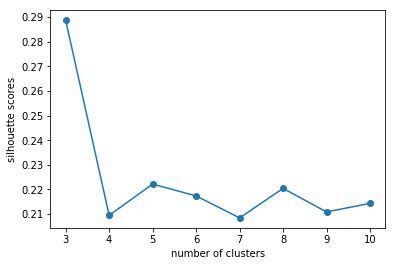

In [1069]:
plot_sil_scores_hclust(segment_data5, k_vals, 'euclidean', 'ward')

[0.2631563053616253, 0.19279154274866706, 0.15493001803994116, 0.1521892821753689, 0.1444050903042592, 0.14035885309131843, 0.15678236604824952, 0.15727909290227846]


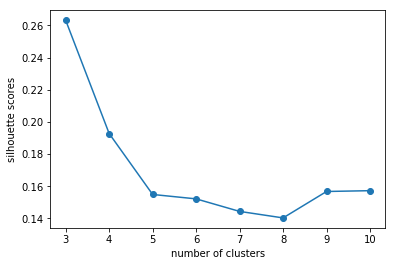

[0.28268071173918863, 0.2233891785674196, 0.1877906466175066, 0.18289483371329762, 0.14528266154799502, 0.12822978033413593, 0.12262087758045793, 0.11401445297069443]


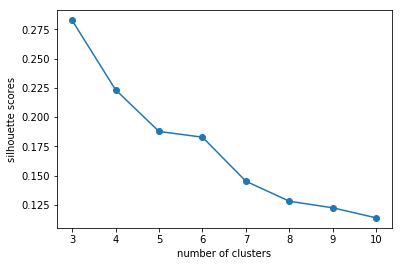

[0.28268071173918863, 0.2233891785674196, 0.1877906466175066, 0.18289483371329762, 0.14528266154799502, 0.12822978033413593, 0.12262087758045793, 0.11401445297069443]


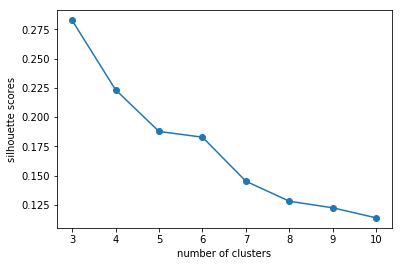

[0.2631563053616253, 0.19279154274866706, 0.15493001803994116, 0.1521892821753689, 0.1444050903042592, 0.14035885309131843, 0.15678236604824952, 0.15727909290227846]


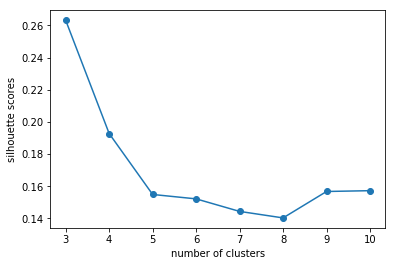

[0.15396717139398122, 0.09560821299767473, 0.1564840593933608, 0.14479613043290704, 0.13448056888572835, 0.13002688722172423, 0.1312454034212603, 0.1403081544138348]


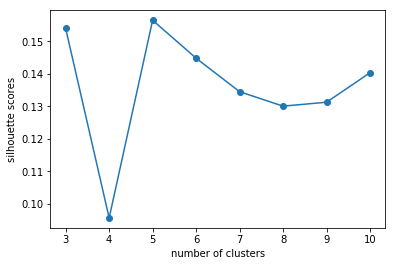

In [1070]:
plot_sil_scores_hclust(segment_data5, k_vals, 'euclidean', 'complete')
plot_sil_scores_hclust(segment_data5, k_vals, 'manhattan', 'complete')
plot_sil_scores_hclust(segment_data5, k_vals, 'l1', 'complete')
plot_sil_scores_hclust(segment_data5, k_vals, 'l2', 'complete')
plot_sil_scores_hclust(segment_data5, k_vals, 'cosine', 'complete')

[0.3707120642052499, 0.31037934281046947, 0.2444962154896893, 0.21570268501696044, 0.17839017326907747, 0.1863203795366144, 0.19951391627979922, 0.19087163054748138]


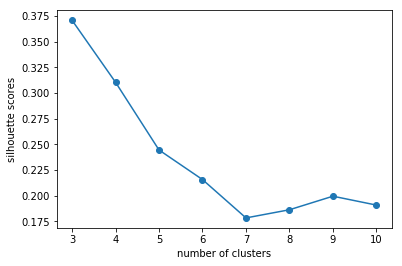

[0.3707120642052499, 0.289184021774239, 0.2209413102407329, 0.21935605837558947, 0.1906059210082266, 0.1807708072047177, 0.18635495478548808, 0.17685700553584943]


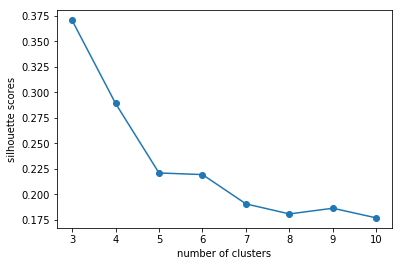

[0.3707120642052499, 0.289184021774239, 0.2209413102407329, 0.21935605837558947, 0.1906059210082266, 0.1807708072047177, 0.18635495478548808, 0.17685700553584943]


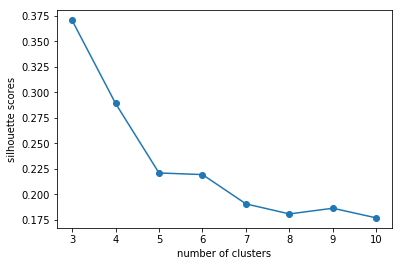

[0.3707120642052499, 0.31037934281046947, 0.2444962154896893, 0.21570268501696044, 0.17839017326907747, 0.1863203795366144, 0.19951391627979922, 0.19087163054748138]


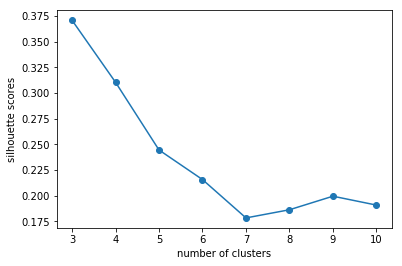

[0.36368984669548016, 0.29370657957198576, 0.20260379892370245, 0.17923154764529187, 0.13495636958524007, 0.15606980299159431, 0.13923282125943026, 0.16194806502851333]


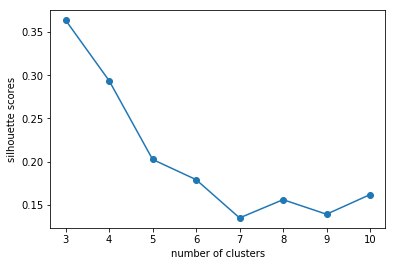

In [1071]:
plot_sil_scores_hclust(segment_data5, k_vals, 'euclidean', 'average')
plot_sil_scores_hclust(segment_data5, k_vals, 'manhattan', 'average')
plot_sil_scores_hclust(segment_data5, k_vals, 'l1', 'average')
plot_sil_scores_hclust(segment_data5, k_vals, 'l2', 'average')
plot_sil_scores_hclust(segment_data5, k_vals, 'cosine', 'average')

#### Segment Vars 6

[0.4466824029196842, 0.36446727426353764, 0.36352001607899864, 0.3943969728648016, 0.35337601902053767, 0.37427705151046015, 0.3965699809954898, 0.4176743838258855]


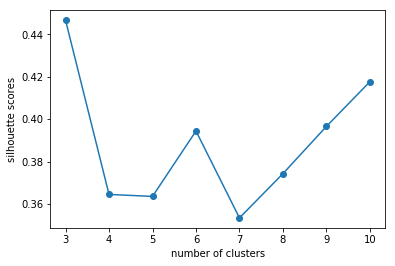

In [1073]:
plot_sil_scores_hclust(segment_data6, k_vals, 'euclidean', 'ward')

[0.40557299076321307, 0.2745080328604642, 0.2961411940856988, 0.28544186630156, 0.33035976354911695, 0.35418124905961146, 0.3821826489036282, 0.3817986816120296]


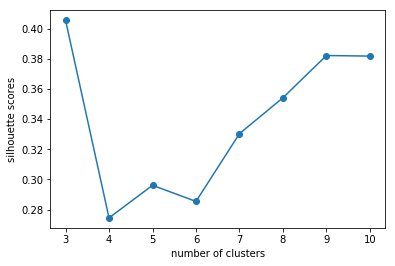

[0.41263118008790844, 0.3145545957487936, 0.33304426363816153, 0.3211032106069021, 0.31671405259061847, 0.3420348662925798, 0.3109189002666847, 0.3469027852941921]


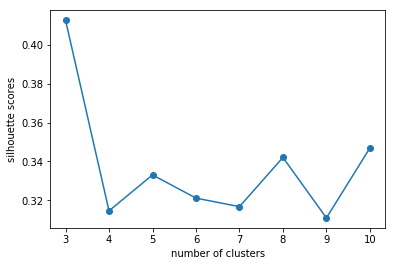

[0.41263118008790844, 0.3145545957487936, 0.33304426363816153, 0.3211032106069021, 0.31671405259061847, 0.3420348662925798, 0.3109189002666847, 0.3469027852941921]


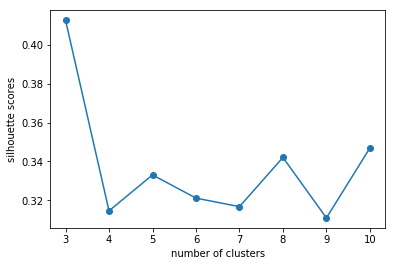

[0.40557299076321307, 0.2745080328604642, 0.2961411940856988, 0.28544186630156, 0.33035976354911695, 0.35418124905961146, 0.3821826489036282, 0.3817986816120296]


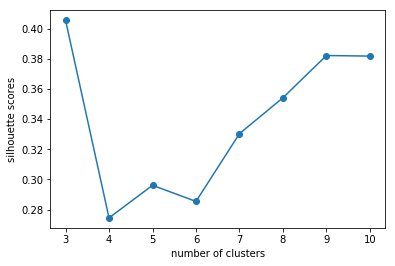

[0.36828005743248693, 0.17897388807977954, 0.1760569512933602, 0.22876763822034307, 0.22786079264245102, 0.22454588514809412, 0.2105112512731423, 0.24169783872336673]


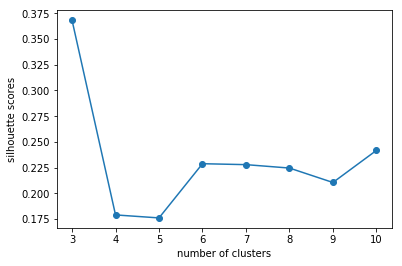

In [1074]:
plot_sil_scores_hclust(segment_data6, k_vals, 'euclidean', 'complete')
plot_sil_scores_hclust(segment_data6, k_vals, 'manhattan', 'complete')
plot_sil_scores_hclust(segment_data6, k_vals, 'l1', 'complete')
plot_sil_scores_hclust(segment_data6, k_vals, 'l2', 'complete')
plot_sil_scores_hclust(segment_data6, k_vals, 'cosine', 'complete')

[0.4525004545007806, 0.3841281149087177, 0.34128809405303223, 0.31226010464319537, 0.2586271880159673, 0.23822074211254193, 0.23372930810524115, 0.29110313984745895]


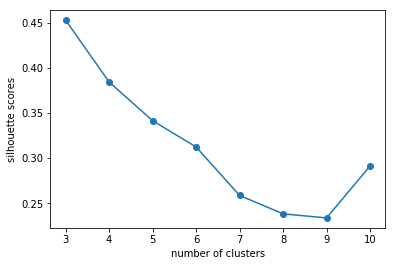

[0.46380544771762716, 0.3539073840329911, 0.28380813956557827, 0.31719346991113206, 0.29433166144927686, 0.28554139267092327, 0.2608632371433378, 0.2601105250397447]


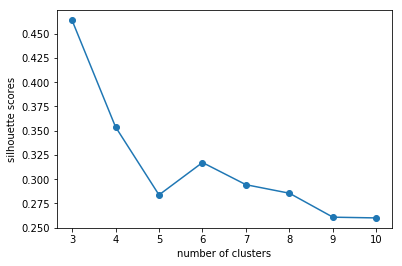

[0.46380544771762716, 0.3539073840329911, 0.28380813956557827, 0.31719346991113206, 0.29433166144927686, 0.28554139267092327, 0.2608632371433378, 0.2601105250397447]


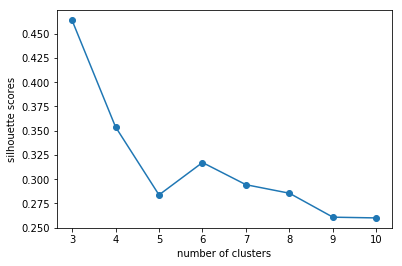

[0.4525004545007806, 0.3841281149087177, 0.34128809405303223, 0.31226010464319537, 0.2586271880159673, 0.23822074211254193, 0.23372930810524115, 0.29110313984745895]


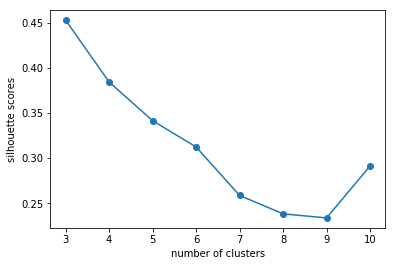

[0.4657208875146521, 0.37023633203534667, 0.38584788133303727, 0.3276957133490589, 0.3184504954110834, 0.290834266602026, 0.2920905020083515, 0.2953110848031887]


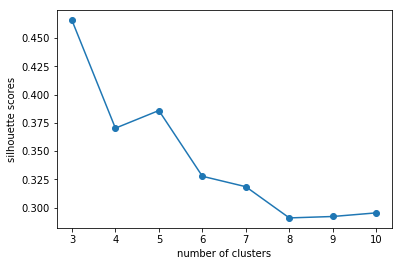

In [1072]:
plot_sil_scores_hclust(segment_data6, k_vals, 'euclidean', 'average')
plot_sil_scores_hclust(segment_data6, k_vals, 'manhattan', 'average')
plot_sil_scores_hclust(segment_data6, k_vals, 'l1', 'average')
plot_sil_scores_hclust(segment_data6, k_vals, 'l2', 'average')
plot_sil_scores_hclust(segment_data6, k_vals, 'cosine', 'average')

# Gaussian Mixture Models

**Parameters to try**:
- Covariance_type:
    - 'full'
    - 'tied'
    - 'diag'
    - 'spherical'
- max_iter

In [819]:
def plot_scores_gauss(X, k_vals, cov_type, max_iter = 100):
    sil_scores = []
    aic_scores = []
    bic_scores = []
    for k in k_vals:
        model = GaussianMixture(n_components = k, 
                                covariance_type= cov_type,
                                max_iter = max_iter)
        fit_model = model.fit(X)
        labels = model.predict(X)
        sil = silhouette_score(X, labels)        
        aic = model.aic(X)
        bic = model.bic(X)
        sil_scores.append(sil)
        aic_scores.append(aic)
        bic_scores.append(bic)
        
    fig, ax = plt.subplots()
    ax.plot(k_vals, sil_scores, 'o-')
    ax.set_xlabel("number of clusters")
    ax.set_ylabel("silhouette scores")
    ax.set_title('Silhoutte Score cov_type = {}'.format(cov_type))
    print(sil_scores)
    
    fig, ax = plt.subplots()
    ax.plot(k_vals, aic_scores, 'o-')
    ax.set_xlabel("number of clusters")
    ax.set_ylabel("AIC scores")
    ax.set_title('AIC Score cov_type = {}'.format(cov_type))
    
    fig, ax = plt.subplots()
    ax.plot(k_vals, bic_scores, 'o-')
    ax.set_xlabel("number of clusters")
    ax.set_ylabel("BIC scores")
    ax.set_title('BIC Score cov_type = {}'.format(cov_type))

    plt.show()

#### Segment Vars2

[0.13272696708937645, 0.07630788486915129, 0.05866429462045881, 0.05210247981467005, 0.041194111548251054, 0.04236977743089256, 0.039490619335687024, 0.028851718814993068]


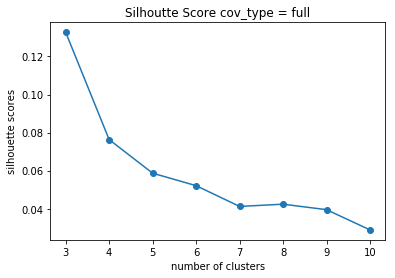

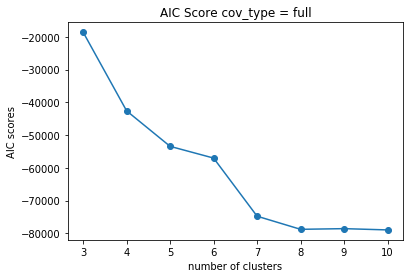

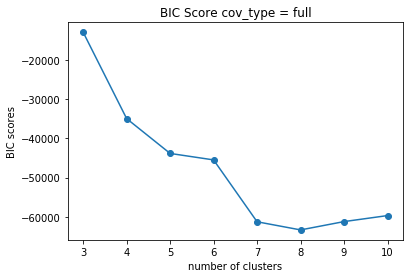

In [820]:
plot_scores_gauss(segment_data2, k_vals, 'full', max_iter = 100)

[0.08395521975104223, 0.07641204182910918, 0.06176524184413499, 0.03892376809010135, 0.03517600082946901, 0.03580849634083481, 0.027724604693998577, 0.029791698196501182]


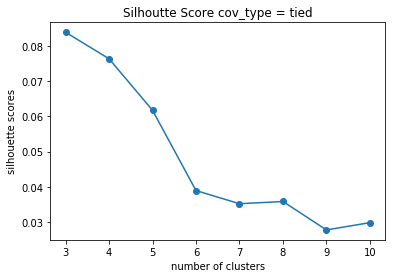

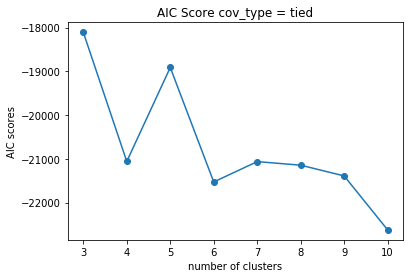

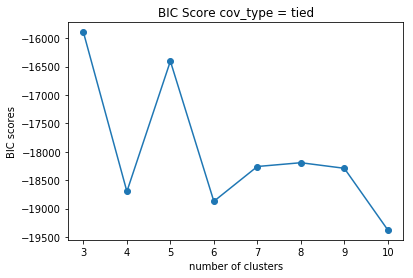

In [821]:
plot_scores_gauss(segment_data2, k_vals, 'tied', max_iter = 100)

[0.11912842015009757, 0.09657140794549786, 0.06477977240225329, 0.04263305650670512, 0.054032773192841756, 0.04254410526894996, 0.04280352759265344, 0.037532960958687425]


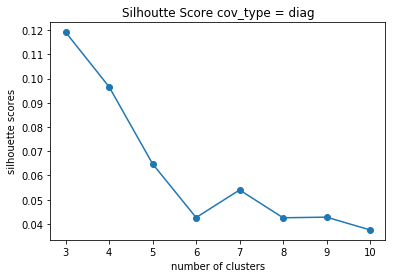

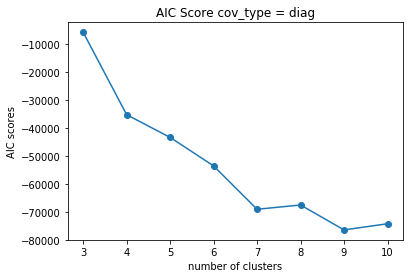

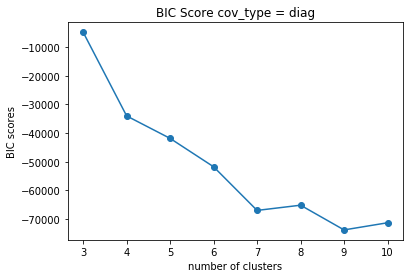

In [822]:
plot_scores_gauss(segment_data2, k_vals, 'diag', max_iter = 100)

[0.085488014011935, 0.08617427268812478, 0.0807697308045371, 0.07843206597061762, 0.06481049158658424, 0.0597723620464936, 0.048686798010215554, 0.05128747471691563]


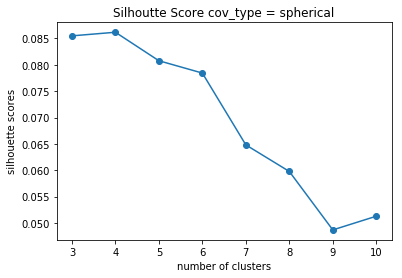

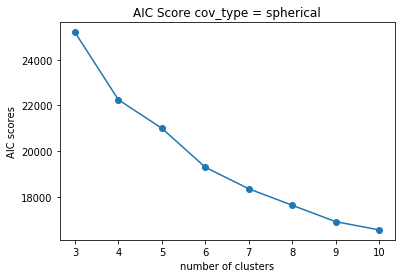

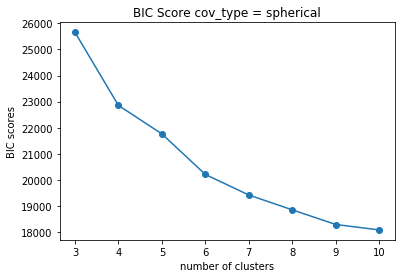

In [823]:
plot_scores_gauss(segment_data2, k_vals, 'spherical', max_iter = 100)

#### Segment Vars3

[0.2398324633859641, 0.1442859782535471, 0.11210593643561326, 0.11790171925379171, 0.08968630472694483, 0.061598409106607306, 0.055398912931751906, 0.03793542702671189]


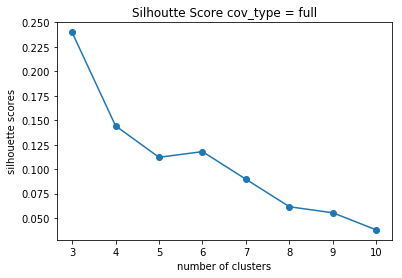

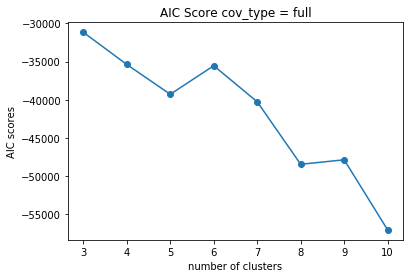

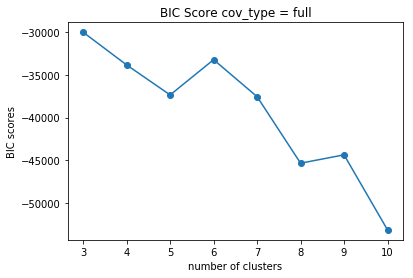

In [839]:
plot_scores_gauss(segment_data3, k_vals, 'full', max_iter = 100)

[0.23568043430924165, 0.15222732962863356, 0.11658004264600552, 0.14105897237753934, 0.1104991192690874, 0.12117319169256514, 0.11531733486904024, 0.09269018896954939]


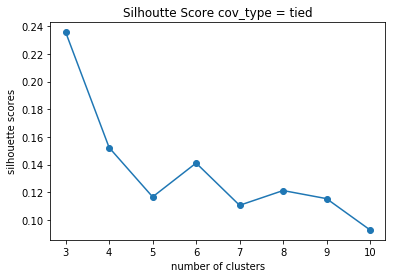

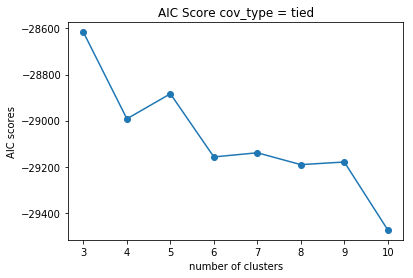

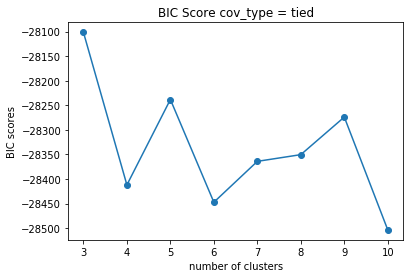

In [834]:
plot_scores_gauss(segment_data3, k_vals, 'tied', max_iter = 100)

[0.16900400425005788, 0.1777368351568854, 0.12373411300170617, 0.07441186231001981, 0.09558903332981529, 0.06770706138599453, 0.06317698696308852, 0.0476402018830301]


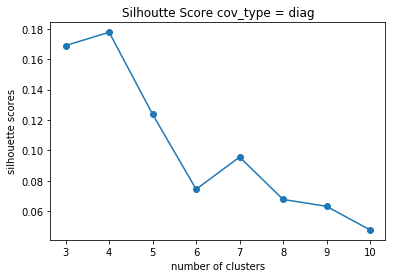

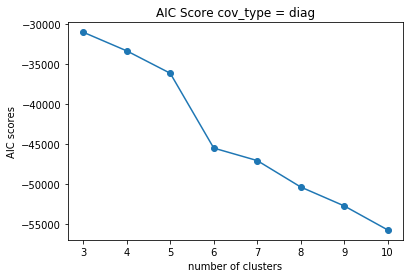

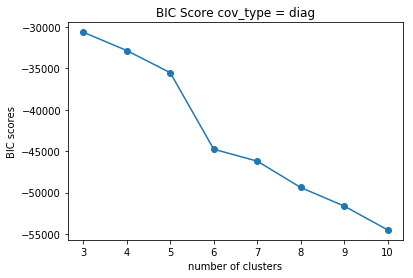

In [836]:
plot_scores_gauss(segment_data3, k_vals, 'diag', max_iter = 100)

[0.24170808025294843, 0.20264252194875726, 0.14950011270797467, 0.1460405523834264, 0.1415828145627463, 0.13015175559506925, 0.1292547429808676, 0.11741107947394447]


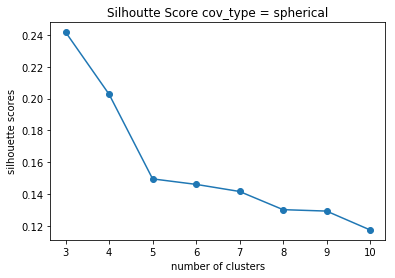

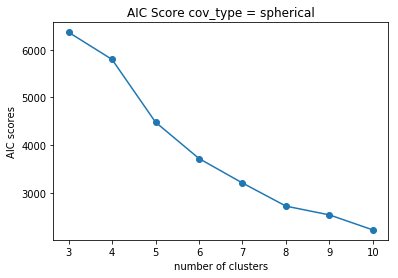

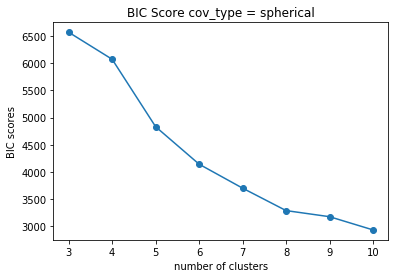

In [837]:
plot_scores_gauss(segment_data3, k_vals, 'spherical', max_iter = 100)

#### Segment Vars4

[0.14018929352558143, 0.09287390671259639, 0.07407575724599356, 0.04571143505483735, 0.0532865251238808, 0.024811920878231777, 0.0222742399581355, 0.026524964227675547]


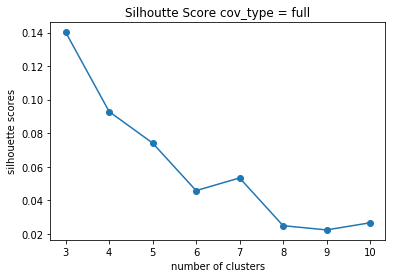

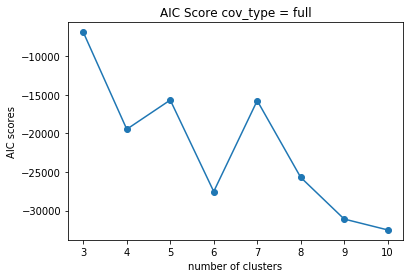

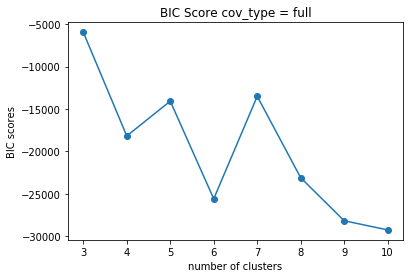

In [830]:
plot_scores_gauss(segment_data4, k_vals, 'full', max_iter = 100)

[0.13671918368062486, 0.11769494873469602, 0.10629331077714353, 0.11145267779284147, 0.09881926307641979, 0.09900752472057299, 0.09942965165384803, 0.09405986457759781]


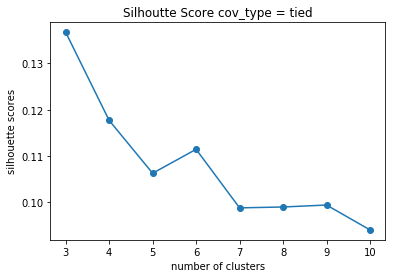

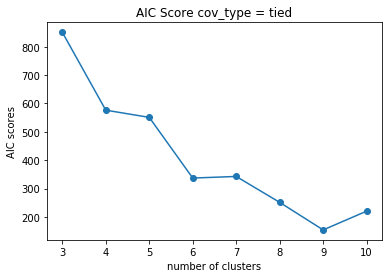

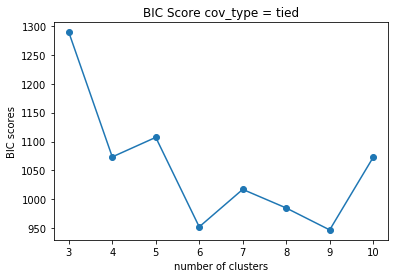

In [831]:
plot_scores_gauss(segment_data4, k_vals, 'tied', max_iter = 100)

[0.09035635901761264, 0.08959778610170682, 0.04907109115858492, 0.06089672008172646, 0.05543132770802623, 0.0689976378231133, 0.07002659712859312, 0.035164313830875794]


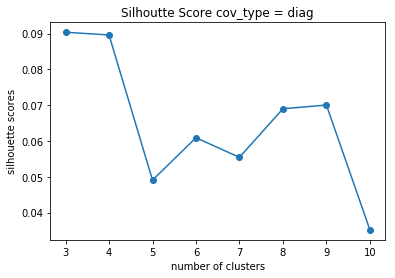

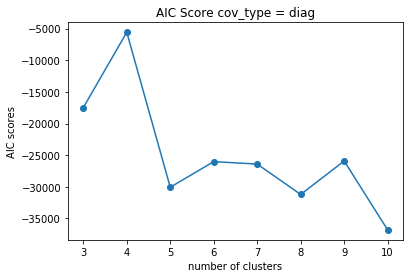

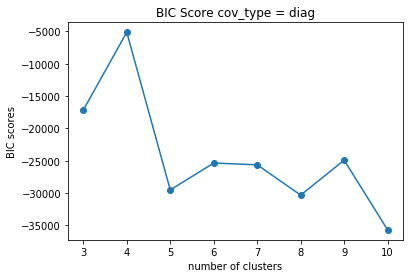

In [832]:
plot_scores_gauss(segment_data4, k_vals, 'diag', max_iter = 100)

[0.15442428494111154, 0.14032240482505007, 0.13062620699236727, 0.12909697658454714, 0.11197104983310842, 0.10421679616869525, 0.11929278567184748, 0.10572185080172157]


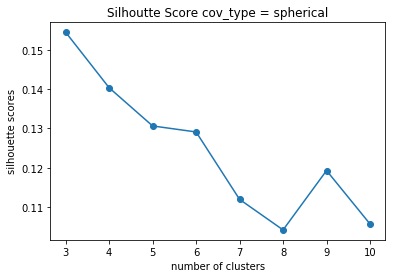

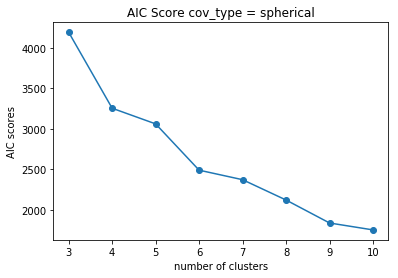

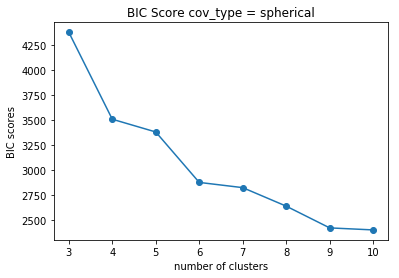

In [833]:
plot_scores_gauss(segment_data4, k_vals, 'spherical', max_iter = 100)

[0.3366979509840268, 0.2727119518921648, 0.23661479750312978, 0.20253608452650512, 0.1834574953187877, 0.22975556866485677, 0.1764848592627878, 0.17323163434904637]


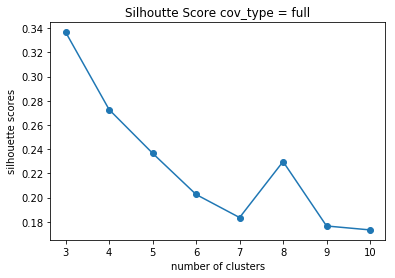

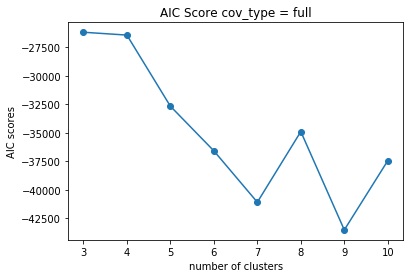

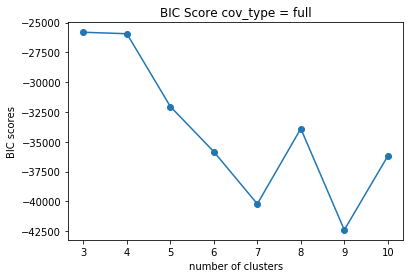

[0.28332190086120024, 0.2648252597799637, 0.26565555645837635, 0.26481353492907045, 0.2465188261702669, 0.2361099993225164, 0.24649815624811086, 0.2472362570935995]


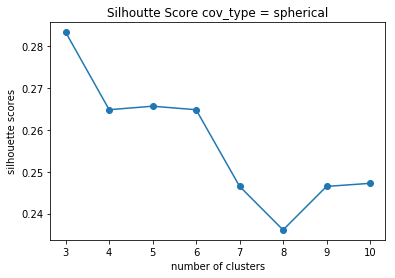

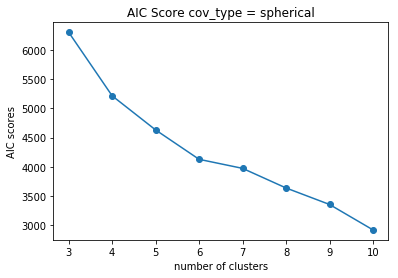

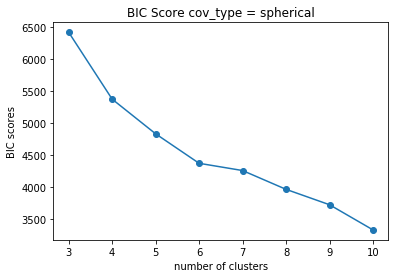

In [1101]:
plot_scores_gauss(segment_data5, k_vals, 'full', max_iter = 100)
plot_scores_gauss(segment_data5, k_vals, 'spherical', max_iter = 100)

[0.4513133122630161, 0.38817548485765757, 0.34233187764797907, 0.31798133839901366, 0.3521931882914248, 0.3449506944053434, 0.3882963974315732, 0.33044984470558897]


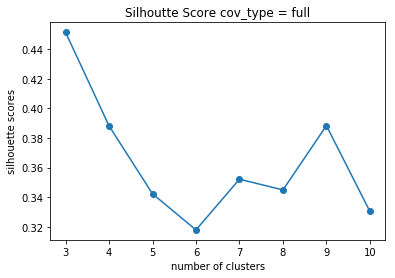

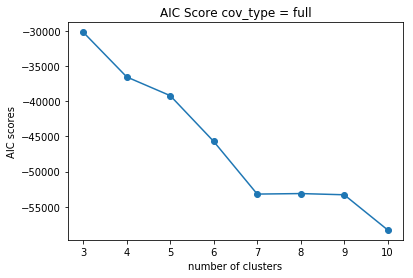

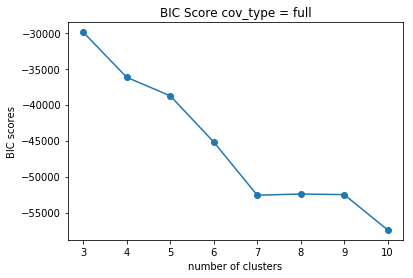

[0.45112717371537525, 0.3984203281468484, 0.37087136052300856, 0.2953609316542209, 0.325650641172188, 0.358740998452963, 0.2863882509300557, 0.3567745063925206]


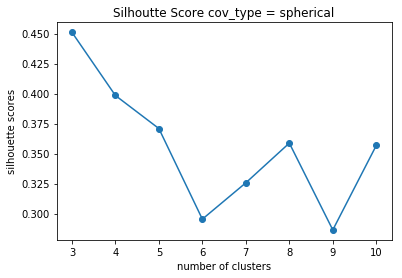

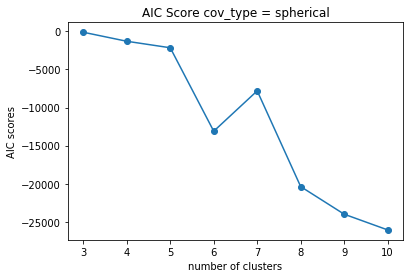

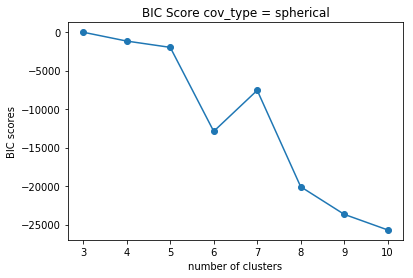

In [1102]:
plot_scores_gauss(segment_data6, k_vals, 'full', max_iter = 100)
plot_scores_gauss(segment_data6, k_vals, 'spherical', max_iter = 100)